In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('fraud_data.csv')

In [9]:
len(df[df['Class']==1])

356

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21693 entries, 0 to 21692
Data columns (total 30 columns):
V1        21693 non-null float64
V2        21693 non-null float64
V3        21693 non-null float64
V4        21693 non-null float64
V5        21693 non-null float64
V6        21693 non-null float64
V7        21693 non-null float64
V8        21693 non-null float64
V9        21693 non-null float64
V10       21693 non-null float64
V11       21693 non-null float64
V12       21693 non-null float64
V13       21693 non-null float64
V14       21693 non-null float64
V15       21693 non-null float64
V16       21693 non-null float64
V17       21693 non-null float64
V18       21693 non-null float64
V19       21693 non-null float64
V20       21693 non-null float64
V21       21693 non-null float64
V22       21693 non-null float64
V23       21693 non-null float64
V24       21693 non-null float64
V25       21693 non-null float64
V26       21693 non-null float64
V27       21693 non-null float64


In [10]:
356/21693

0.016410823768035772

In [12]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [23]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, recall_score

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_dummy_predictions = dummy_majority.predict(X_test)

print(accuracy_score(y_test,y_dummy_predictions))
print(recall_score(y_test, y_dummy_predictions))

0.9852507374631269
0.0


In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
svm = SVC(kernel = 'rbf').fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

accuracy_score(y_test, svm_predicted)
recall_score(y_test, svm_predicted)
precision_score(y_test, svm_predicted)

1.0

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


svm = SVC(C = 1e9, gamma = 1e-07).fit(X_train, y_train)
svm_predictions = svm.decision_function(X_test) >-220

confusion = confusion_matrix(y_test, svm_predictions)

In [30]:
confusion

array([[5320,   24],
       [  14,   66]])

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve
import numpy as np
lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, lr_predicted)

closet_zero_p = np.argmin(np.abs(precision-0.75))
closet_zero_r = recall[closet_zero_p]

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_predicted)
closet_zero_fpr_lr = np.argmin(np.abs(fpr_lr - 0.16))
closet_zero_tpr_lr = recall[closet_zero_fpr_lr]


In [38]:
closet_zero_r

0.7875

In [39]:
closet_zero_tpr_lr

0.7875

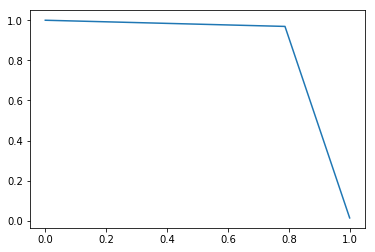

In [41]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(recall, precision);

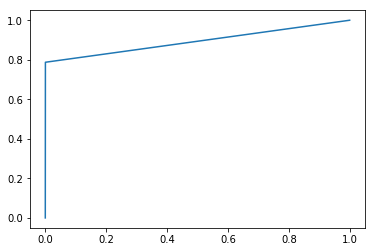

In [42]:
plt.plot(fpr_lr,tpr_lr)

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
grid_values = {'C':[0.01,0.1,1,10,100],'penalty':['l1','l2']}
grid_lr = GridSearchCV(lr, param_grid = grid_values, scoring = 'recall',cv =3)
grid_lr.fit(X_train, y_train)
np.array(grid_lr.cv_results_['mean_test_score'].reshape(5,2))

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ],
       [0.80797101, 0.8115942 ]])

In [45]:
grid_lr.cv_results_['mean_test_score']

array([0.66666667, 0.76086957, 0.80072464, 0.80434783, 0.8115942 ,
       0.8115942 , 0.80797101, 0.8115942 , 0.80797101, 0.8115942 ])